In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/country-regional-and-world-gdp/gdp_csv.csv


In [2]:
data=pd.read_csv('/kaggle/input/country-regional-and-world-gdp/gdp_csv.csv')

In [3]:
data.columns


Index(['Country Name', 'Country Code', 'Year', 'Value'], dtype='object')

In [4]:
data=data.drop(columns='Country Name')

In [5]:
data=data.drop(columns='Country Code')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11507 entries, 0 to 11506
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    11507 non-null  int64  
 1   Value   11507 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 179.9 KB


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
#plt.scatter(data['Year'],data['Value'])
def remove_outliers_iqr(data, threshold=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Remove outliers from the dataset using the function
cleaned_data = remove_outliers_iqr(data['Value'])
#cleaned_data.info()
dataset=pd.concat([cleaned_data,data['Year']],axis=1)
dataset=dataset.dropna()
dataset.shape

(9587, 2)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


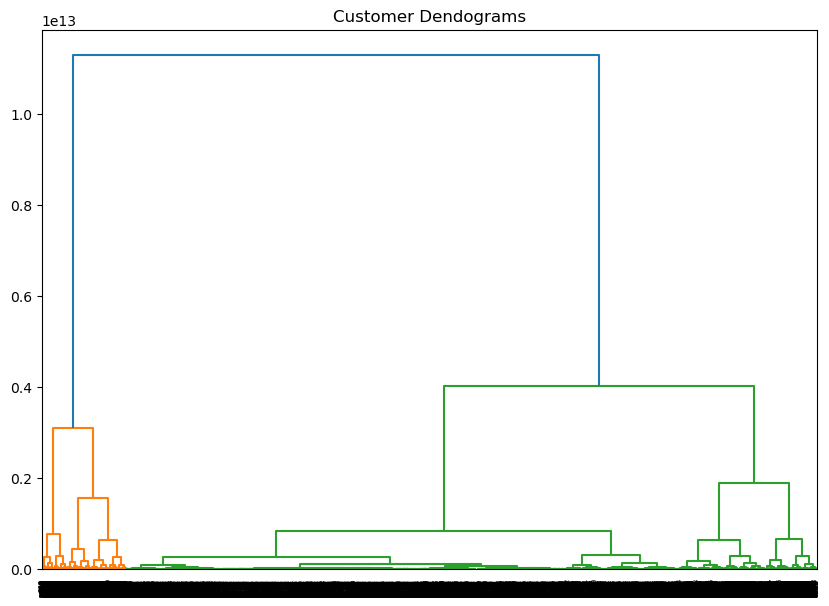

In [7]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(dataset, method='ward'))

In [8]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels_=cluster.fit_predict(dataset)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [9]:
labels_
dataset=np.array(dataset)

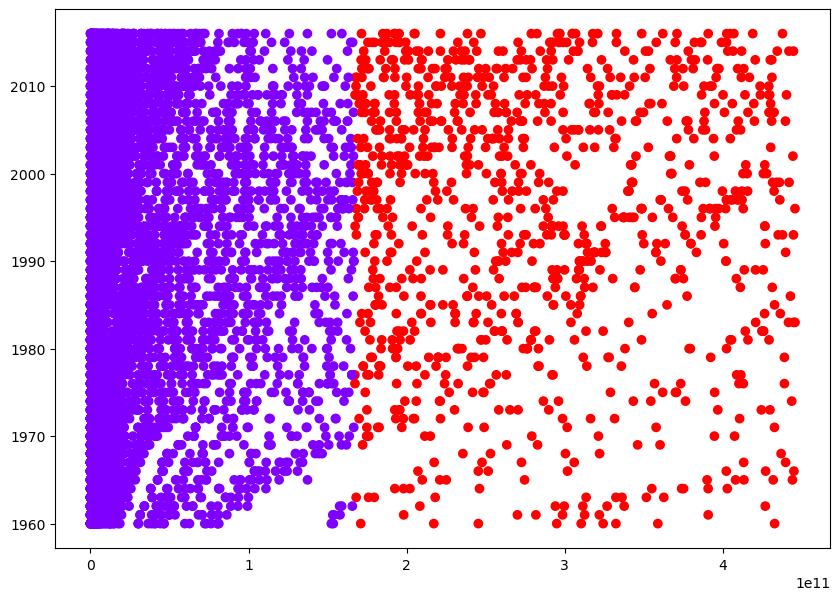

In [10]:
plt.figure(figsize=(10, 7))
plt.scatter(dataset[:,0], dataset[:,1], c=cluster.labels_, cmap='rainbow')
